In [15]:
%matplotlib inline
# With Bayesian Ridge Regression, our data is represented as
# the mean of the coefficients.
# With the Gaussian Process, it's about the variance of the
# coefficients instead of the mean. We assume a mean of 0 so
# we need to specify the covariance function.

In [16]:
from sklearn.datasets import load_boston
import numpy as np

In [17]:
boston = load_boston()
boston_X = boston.data
boston_y = boston.target

In [18]:
train_set = np.random.choice([True, False], len(boston_y), p=[.75, .25])

In [19]:
from sklearn.gaussian_process import GaussianProcess

In [20]:
# GaussianProcess, by default, uses a constant regression function
# and squared exponential correlation.
gp = GaussianProcess()

In [21]:
gp.fit(boston_X[train_set], boston_y[train_set])

GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x1100c8230>, normalize=True,
        nugget=array(2.220446049250313e-15), optimizer='fmin_cobyla',
        random_start=1,
        random_state=<mtrand.RandomState object at 0x10cc79390>,
        regr=<function constant at 0x1100bbde8>, storage_mode='full',
        theta0=array([[ 0.1]]), thetaL=None, thetaU=None, verbose=False)

In [22]:
# beta0: Regression Weight.
# corr: correlation function.
# regr: constant regression function.
# nugget: regularization parameter.
# normalize: boolean value to center and scale the features.

In [23]:
test_preds = gp.predict(boston_X[~train_set])

In [24]:
from matplotlib import pyplot as plt

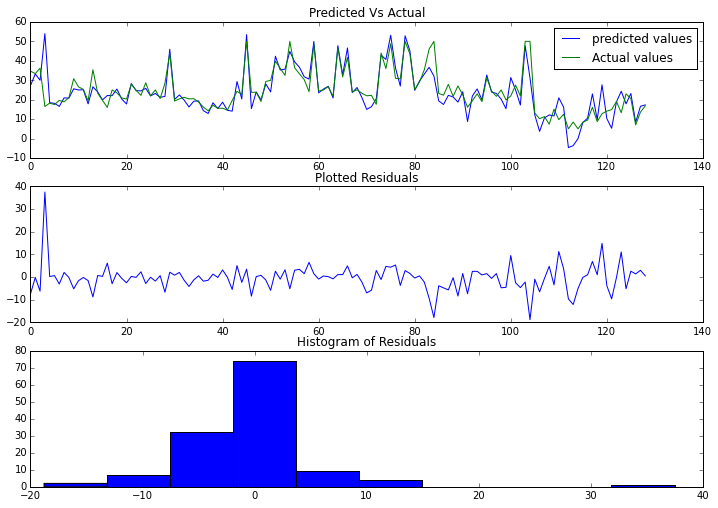

In [25]:
f, ax = plt.subplots(figsize=(10,7), nrows=3)
f.tight_layout()
ax[0].plot(range(len(test_preds)), test_preds, label='predicted values')
ax[0].plot(range(len(test_preds)), boston_y[~train_set], label='Actual values')
ax[0].set_title('Predicted Vs Actual')
ax[0].legend(loc='best')

ax[1].plot(range(len(test_preds)), test_preds - boston_y[~train_set])
ax[1].set_title('Plotted Residuals')

ax[2].hist(test_preds - boston_y[~train_set])
ax[2].set_title("Histogram of Residuals")

In [26]:
# other options for corr function:
#  absolute_exponential
#  squared_exponential (default)
#  generalized_exponential
#  cubic
#  linear

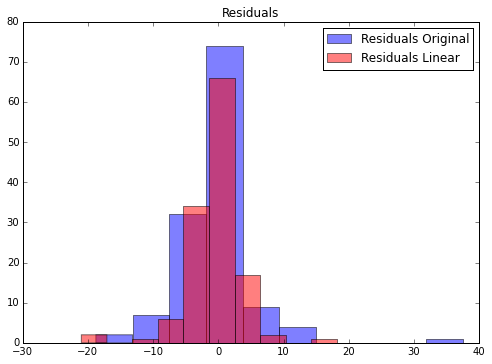

In [27]:
gp = GaussianProcess(regr='linear', theta0=5e-1)
gp.fit(boston_X[train_set], boston_y[train_set])
linear_preds = gp.predict(boston_X[~train_set])
f, ax = plt.subplots(figsize=(7,5))
f.tight_layout()
ax.hist(test_preds - boston_y[~train_set], label='Residuals Original', color='b', alpha=.5)

ax.hist(linear_preds - boston_y[~train_set],
       label='Residuals Linear', color='r', alpha=.5)
ax.set_title('Residuals')
ax.legend(loc='best')

In [28]:
# note on above, the book's results looked better for the
# linear regression model but this shows that on our dataset
# the constant regression function performed better.

In [29]:
np.power(test_preds - boston_y[~train_set], 2).mean()

34.684984216471619

In [30]:
np.power(linear_preds - boston_y[~train_set], 2).mean()

17.8197556372116

In [31]:
test_preds, MSE = gp.predict(boston_X[~train_set], eval_MSE=True)

In [32]:
MSE[:5]

array([ 17.75695417,  23.37606118,  24.11872717,  49.4705034 ,   2.18802223])

In [ ]:
f, ax = plt.subplots(figsize=(7,5))
n = 20
rng = range(20)
ax.scatter(rng, test_preds[:n])
ax.errorbar(rng, test_preds[:n], yerr=1.96*MSE[:n])